In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import math
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("/content/drive/MyDrive/StudyOther/data/Stock_Price_Prediction_AAPL.csv")

In [8]:
df.head(2)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.26,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.95,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0


In [4]:
df1 = df.reset_index()['close']

In [6]:
df1.shape

(1258,)

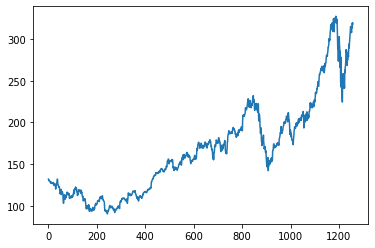

In [9]:
plt.plot(df1)

In [11]:
scaler = MinMaxScaler ( feature_range= (0,1))
df1 = scaler.fit_transform (np.array(df1).reshape (-1, 1))

In [12]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

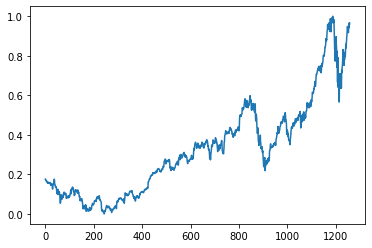

In [13]:
plt.plot(df1)

In [19]:
#65 % train data
tranining_size = int( len(df1) * 0.65)

# 35% test size
test_size = len(df1) - tranining_size 

train_data , test_data =  df1[0:tranining_size , : ] , df1[tranining_size : len(df1) , : 1 ]

In [20]:
traning_size, test_size

(817, 441)

In [21]:
#previous 3 time step

def create_dataset(dataset, time_step = 1):
    dataX , dataY = [], []
    for i in range( len(dataset) - time_step - 1):
      a = dataset [i: (i + time_step) , 0]   ###i=0, 0,1,2,3-----99   100 
      dataX.append(a)
      dataY.append(dataset [ i+ time_step , 0])
    return np.array(dataX) , np.array(dataY)

In [23]:
time_step = 100
X_train , y_train = create_dataset (train_data , time_step)
X_test , y_test = create_dataset(test_data, time_step)

In [26]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((716, 100), (340, 100), (716,), (340,))

In [27]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
model = Sequential()

model.add( LSTM (50, return_sequences = True, input_shape = (100,1)))
model.add( LSTM (50, return_sequences = True))
model.add( LSTM (50))
model.add( Dense (1))

model.compile( loss = 'mean_squared_error', optimizer = 'adam' )

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit ( X_train, y_train, 
           validation_data = (X_test, y_test), 
           epochs = 100,
           batch_size = 64 ,
           verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 332ms/step - loss: 0.0215 - val_loss: 0.0588
Epoch 2/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 3/100
12/12 [==============================] - 3s 217ms/step - loss: 9.9053e-04 - val_loss: 0.0047
Epoch 4/100
12/12 [==============================] - 3s 216ms/step - loss: 9.6720e-04 - val_loss: 0.0048
Epoch 5/100
12/12 [==============================] - 3s 221ms/step - loss: 7.4127e-04 - val_loss: 0.0057
Epoch 6/100
12/12 [==============================] - 3s 220ms/step - loss: 6.6778e-04 - val_loss: 0.0052
Epoch 7/100
12/12 [==============================] - 3s 219ms/step - loss: 6.4009e-04 - val_loss: 0.0058
Epoch 8/100
12/12 [==============================] - 3s 220ms/step - loss: 6.6093e-04 - val_loss: 0.0061
Epoch 9/100
12/12 [==============================] - 3s 216ms/step - loss: 6.7228e-04 - val_loss: 0.0046
Epoch 10/100
12/12 [==============================] - 3s 221ms

In [36]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict  =model.predict(X_test)

In [37]:
##Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [39]:
### Test Data RMSE
math.sqrt( mean_squared_error ( y_test, test_predict ) )

234.48881906296242

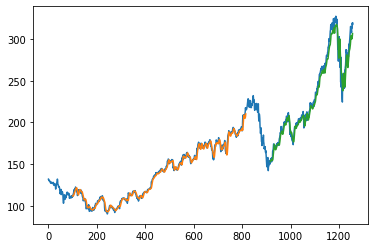

In [41]:
### Plotting 
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

441

In [43]:

x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [45]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9303215]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

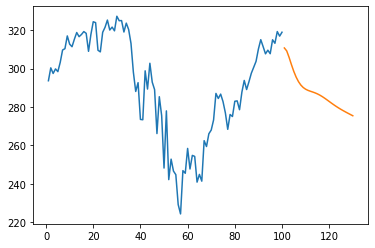

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

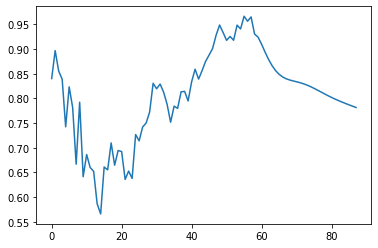

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

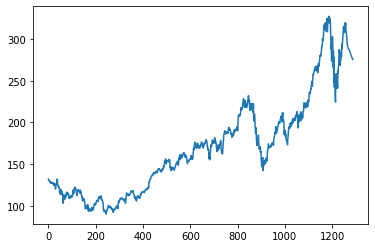

In [50]:
plt.plot(df3)